In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
from skimage import exposure
import glob
import tqdm
# import seaborn as sns
# sns.set()
from math import floor, log10

In [2]:
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\times 10^{{{1:d}}}$".format(coeff, exponent, precision)


## IDL lines

$\textbf{ten has been replaced by flines which makes more sense}$

<code>IDL
    openr, ten, 'fkrplk.test', /get_lun ;open .test and named ten
    readf, ten, dt, tmax, dy, rhomax ;read first line
</code>

In [3]:
with open("./fkrplk_configuracion2/fkrplk.conf2", "r") as file:
    flines = file.readlines()

f_list = [float(i) for i in flines[0].split(" ") if i.strip()]
dt = f_list[0]
tmax = f_list[1]
dy = f_list[2]
rhomax = f_list[3]

print("dt=%f, tmax=%f, dy=%f, rhomax=%f"%(dt,tmax,dy,rhomax))

dt=0.000556, tmax=10.510000, dy=0.000033, rhomax=100000000000.000000


In [4]:
f_list = [int(i) for i in flines[1].split(" ") if i.strip()]
newr = int(f_list[0])
nmu = int(f_list[1])
ntau = int(f_list[2])
ntr = int(f_list[3])

print("newr=%i, nmu=%i, ntau=%i, ntr=%i"%(newr,nmu,ntau,ntr))

newr=60, nmu=30, ntau=60, ntr=99


## Continues
It creates arrays of zeros with different sizes. 
I will see if this is necessary in Python or if it is possible to use a turn around.

<font size="5">Starting at line 3, all values were unrolled to 1D array
and lenghts given in IDL .pro are used to extract variables values</font>


<code>IDL
    ekev = fltarr(newr+1) ;array zeros lenght newr+1
    amu = fltarr(2*nmu+1) ;array zeros lenght 2nmu+1
    dtau = fltarr(ntau) ;array zeros lenght ntau
    tau = dtau ;tau = dtau
    soft = dtau & bm = fltarr(ntau+1) ;array zeros soft lenght dtau and bm lenght ntau+1
    tr = fltarr(ntr+1) ;array zeros lenght ntr+1
</code>
   
 It puts all the folowing values til the match the proper lenght within the ekev array
 
<code>IDL
    readf, ten, ekev
    eta = double(ekev/510.99)
    beta = sqrt(1.0-1.0/(eta+1.0)^2)
    eta = eta^2/(eta+1.0)
    </code>

In [5]:
#From line 3(idx 2) all values are unrolled
#Making a single array which contain all values
unrolled_values = np.array([float(i) for j in range(2,len(flines)) for i in flines[j].split(" ")  if i.strip()])

In [6]:
ekev = unrolled_values[0:newr+1].copy()
nstart = newr+1 #Defines newstart for next variable
eta = ekev/510.99
beta = np.sqrt(1-(1/(eta+1)**2))
eta = eta**2/(eta+1)
ekev,eta

(array([ 10.    ,  12.5   ,  15.132 ,  17.9029,  20.8201,  23.8913,
         27.1247,  30.5287,  34.1124,  37.8854,  41.8575,  46.0393,
         50.4419,  55.0769,  59.9565,  65.0938,  70.5023,  76.1963,
         82.1909,  88.502 ,  95.1463, 102.141 , 109.506 , 117.259 ,
        125.421 , 134.014 , 143.061 , 152.586 , 162.613 , 173.17  ,
        184.284 , 195.984 , 208.303 , 221.271 , 234.925 , 249.299 ,
        264.432 , 280.364 , 297.137 , 314.795 , 333.386 , 352.958 ,
        373.563 , 395.256 , 418.094 , 442.138 , 467.452 , 494.101 ,
        522.158 , 551.695 , 582.792 , 615.531 , 649.998 , 686.284 ,
        724.486 , 764.705 , 807.047 , 851.625 , 898.555 , 947.964 ,
        999.98  ]),
 array([3.75628219e-04, 5.84116178e-04, 8.51714031e-04, 1.18595069e-03,
        1.59513205e-03, 2.08838107e-03, 2.67573211e-03, 3.36814487e-03,
        4.17766927e-03, 5.11749688e-03, 6.20195800e-03, 7.44675358e-03,
        8.86897411e-03, 1.04871822e-02, 1.23215326e-02, 1.43939897e-02,
        1.67

## Continues...
It continues to fill variables 
<code>IDL
    readf, ten, amu
    pad = 180.0*acos(amu)/!Pi
    readf, ten, dtau
    readf, ten, tau
    tau = [0.0, tau]
    readf, ten, soft
    soft = [0.0,soft]
    readf, ten, bm
    </code>

In [7]:
amu = unrolled_values[nstart:nstart+(2*nmu+1)] #2*nmu+1 defines size but it has to start where it finished last time and goes til lenght 
nstart = nstart+(2*nmu+1) #Defines newstart for next variable
pad = 180.*np.arccos(amu)/np.pi
pad

array([180.        , 165.16496301, 158.96047702, 154.15806724,
       150.07360342, 146.44265569, 143.13010235, 140.05552456,
       137.16654384, 134.427004  , 131.81034052, 129.29645556,
       126.86989765, 124.51813102, 122.23093006, 120.        ,
       117.81816088, 115.67926743, 113.57817848, 111.5102088 ,
       109.47120038, 107.45760312, 105.46602977, 103.49337918,
       101.53695903,  99.5940876 ,  97.66223639,  95.73917048,
        93.82255564,  91.91021126,  90.        ,  88.08978874,
        86.17744436,  84.26082952,  82.33776361,  80.4059124 ,
        78.46304097,  76.50662082,  74.53397023,  72.54239688,
        70.52879962,  68.4897912 ,  66.42182152,  64.32073257,
        62.18183912,  60.        ,  57.76906994,  55.48186898,
        53.13010235,  50.70354444,  48.18965948,  45.572996  ,
        42.83345616,  39.94447544,  36.86989765,  33.55734431,
        29.92639658,  25.84193276,  21.03952298,  14.83503699,
         0.        ])

In [8]:
dtau = unrolled_values[nstart:nstart+ntau] #ntau defines lenght and nstart the index in which it starts
nstart = nstart+ntau
dtau

array([3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05,
       3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05,
       3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05,
       3.33333e-05, 3.33333e-05, 3.33334e-05, 3.33333e-05, 3.33333e-05,
       3.33334e-05, 3.33333e-05, 3.33333e-05, 3.33334e-05, 3.33333e-05,
       3.33333e-05, 3.33333e-05, 3.33334e-05, 3.33333e-05, 3.33334e-05,
       3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05,
       3.33334e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05,
       3.33333e-05, 3.33334e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05,
       3.33333e-05, 3.33333e-05, 3.33334e-05, 3.33333e-05, 3.33333e-05,
       3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33334e-05,
       3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33333e-05, 3.33334e-05])

In [9]:
# Both in tau and soft a 0 is inserted at the beggining of array using np.insert
tau = np.insert(unrolled_values[nstart:nstart+ntau], 0, 0) #in the original code they make tau=dtau meaning they got the same lenght
nstart = nstart+ntau #Defines newstart for next variable
soft = np.insert(unrolled_values[nstart:nstart+ntau], 0, 0, axis=0) #in the original code they make soft=dtau meaning they got the same lenght
nstart = nstart+ntau #Defines newstart for next variable
tau,soft

(array([0.00000e+00, 3.33333e-05, 6.66667e-05, 1.00000e-04, 1.33333e-04,
        1.66667e-04, 2.00000e-04, 2.33333e-04, 2.66667e-04, 3.00000e-04,
        3.33333e-04, 3.66667e-04, 4.00000e-04, 4.33333e-04, 4.66667e-04,
        5.00000e-04, 5.33333e-04, 5.66667e-04, 6.00000e-04, 6.33333e-04,
        6.66667e-04, 7.00000e-04, 7.33333e-04, 7.66667e-04, 8.00000e-04,
        8.33333e-04, 8.66667e-04, 9.00000e-04, 9.33333e-04, 9.66667e-04,
        1.00000e-03, 1.03333e-03, 1.06667e-03, 1.10000e-03, 1.13333e-03,
        1.16667e-03, 1.20000e-03, 1.23333e-03, 1.26667e-03, 1.30000e-03,
        1.33333e-03, 1.36667e-03, 1.40000e-03, 1.43333e-03, 1.46667e-03,
        1.50000e-03, 1.53333e-03, 1.56667e-03, 1.60000e-03, 1.63333e-03,
        1.66667e-03, 1.70000e-03, 1.73333e-03, 1.76667e-03, 1.80000e-03,
        1.83333e-03, 1.86667e-03, 1.90000e-03, 1.93333e-03, 1.96667e-03,
        2.00000e-03]),
 array([0.00000e+00, 1.66667e+07, 3.33333e+07, 5.00000e+07, 6.66667e+07,
        8.33333e+07, 1.00000

In [10]:
bm = unrolled_values[nstart:nstart+ntau+1]
nstart = nstart+ntau+1 #Defines newstart for next variable
bm

array([100.   , 100.028, 100.111, 100.25 , 100.444, 100.694, 101.   ,
       101.361, 101.778, 102.25 , 102.778, 103.361, 104.   , 104.694,
       105.444, 106.25 , 107.111, 108.028, 109.   , 110.028, 111.111,
       112.25 , 113.444, 114.694, 116.   , 117.361, 118.778, 120.25 ,
       121.778, 123.361, 125.   , 126.694, 128.444, 130.25 , 132.111,
       134.028, 136.   , 138.028, 140.111, 142.25 , 144.444, 146.694,
       149.   , 151.361, 153.778, 156.25 , 158.778, 161.361, 164.   ,
       166.694, 169.444, 172.25 , 175.111, 178.028, 181.   , 184.028,
       187.111, 190.25 , 193.444, 196.694, 200.   ])

<font size="3">Here we have to extract values in a foor loop</font>

<code>IDL
    phi = fltarr(newr+1, 2*nmu+1, ntau+1, ntr+1)
    tphi = phi( *, *, *, 0)
    i = fltarr(ntr+1)
    temp = fltarr(2)
    FOR itr = 0, ntr DO BEGIN
       readf, ten, temp
       tr(itr) = temp(0)
       i(itr) = temp(1)
       readf, ten, tphi
       phi( *, *, *, itr) = tphi
    ENDFOR
    free_lun, ten
    </code>

In [11]:
#We make a new array with the remaining values to work with
arr_remained = unrolled_values[nstart:].copy()

In [12]:
chuncksize = (newr+1) * (2*nmu+1) * (ntau+1) ## Size of values inbetween indented values
tr = arr_remained[::chuncksize+2]
i = arr_remained[1::chuncksize+2]

In [13]:
# It extracts all values in between indented numbers
# Resulting array has the size of the tr times chunksize


phi_plain = []
for idx in tqdm.tqdm(range(len(tr)-1)):
    idxinit = np.argwhere(arr_remained==i[idx])[0][0] + 1
    idxfina = np.argwhere(arr_remained==tr[idx+1])[0][0]
    arr_tri = arr_remained[idxinit:idxfina].copy()
    phi_plain.append(arr_tri)
    if idx == (len(tr)-2):
        idxinit = np.argwhere(arr_remained==i[idx+1])[0][0] + 1
        arr_tri = arr_remained[idxinit:].copy()
        phi_plain.append(arr_tri)
        
phi_plain = np.array(phi_plain)    

100%|██████████| 99/99 [00:05<00:00, 18.92it/s]


In [14]:
## Reshape data to match IDL phi
# Python goes backwards compare to IDL, so shape is: ntr+1,(ntau+1),(newr+1),(2*nmu+1)
phi = np.reshape(phi_plain,newshape=(ntr+1,(ntau+1),(newr+1),(2*nmu+1)))
phi.shape

(100, 61, 61, 61)

In [15]:
## soft = Distances
## pad = Pitch Angles
## ekev = Energies

In [17]:
soft/1e5

array([    0.   ,   166.667,   333.333,   500.   ,   666.667,   833.333,
        1000.   ,  1166.67 ,  1333.33 ,  1500.   ,  1666.67 ,  1833.33 ,
        2000.   ,  2166.67 ,  2333.33 ,  2500.   ,  2666.67 ,  2833.33 ,
        3000.   ,  3166.67 ,  3333.33 ,  3500.   ,  3666.67 ,  3833.33 ,
        4000.   ,  4166.67 ,  4333.33 ,  4500.   ,  4666.67 ,  4833.33 ,
        5000.   ,  5166.67 ,  5333.33 ,  5500.   ,  5666.67 ,  5833.33 ,
        6000.   ,  6166.67 ,  6333.33 ,  6500.   ,  6666.67 ,  6833.33 ,
        7000.   ,  7166.67 ,  7333.33 ,  7500.   ,  7666.67 ,  7833.33 ,
        8000.   ,  8166.67 ,  8333.33 ,  8500.   ,  8666.67 ,  8833.33 ,
        9000.   ,  9166.67 ,  9333.33 ,  9500.   ,  9666.67 ,  9833.33 ,
       10000.   ])

In [18]:
pad

array([180.        , 165.16496301, 158.96047702, 154.15806724,
       150.07360342, 146.44265569, 143.13010235, 140.05552456,
       137.16654384, 134.427004  , 131.81034052, 129.29645556,
       126.86989765, 124.51813102, 122.23093006, 120.        ,
       117.81816088, 115.67926743, 113.57817848, 111.5102088 ,
       109.47120038, 107.45760312, 105.46602977, 103.49337918,
       101.53695903,  99.5940876 ,  97.66223639,  95.73917048,
        93.82255564,  91.91021126,  90.        ,  88.08978874,
        86.17744436,  84.26082952,  82.33776361,  80.4059124 ,
        78.46304097,  76.50662082,  74.53397023,  72.54239688,
        70.52879962,  68.4897912 ,  66.42182152,  64.32073257,
        62.18183912,  60.        ,  57.76906994,  55.48186898,
        53.13010235,  50.70354444,  48.18965948,  45.572996  ,
        42.83345616,  39.94447544,  36.86989765,  33.55734431,
        29.92639658,  25.84193276,  21.03952298,  14.83503699,
         0.        ])

In [19]:
ekev

array([ 10.    ,  12.5   ,  15.132 ,  17.9029,  20.8201,  23.8913,
        27.1247,  30.5287,  34.1124,  37.8854,  41.8575,  46.0393,
        50.4419,  55.0769,  59.9565,  65.0938,  70.5023,  76.1963,
        82.1909,  88.502 ,  95.1463, 102.141 , 109.506 , 117.259 ,
       125.421 , 134.014 , 143.061 , 152.586 , 162.613 , 173.17  ,
       184.284 , 195.984 , 208.303 , 221.271 , 234.925 , 249.299 ,
       264.432 , 280.364 , 297.137 , 314.795 , 333.386 , 352.958 ,
       373.563 , 395.256 , 418.094 , 442.138 , 467.452 , 494.101 ,
       522.158 , 551.695 , 582.792 , 615.531 , 649.998 , 686.284 ,
       724.486 , 764.705 , 807.047 , 851.625 , 898.555 , 947.964 ,
       999.98  ])

# START IDL PLOTS!!!!

<font size="3">First qtties E0-4, REFORM does nothing</font>

<code>IDL
    ;Specify the values of the indices that remain fixed
    paindex=0
    sindex=10
    eindex=10
    ;Plot data
    phiE0 = Reform(phi(*,paindex,sindex,0))
    phiE1 = Reform(phi(*,paindex,sindex,1))
    phiE2 = Reform(phi(*,paindex,sindex,2))
    phiE3 = Reform(phi(*,paindex,sindex,3))
    phiE4 = Reform(phi(*,paindex,sindex,4))
    </code>

In [21]:
paindex=0
sindex=10
eindex=10


In [22]:
phiE0 = phi[0,sindex,paindex,:].copy()  ### tiempo, distance, pitch, energia
phiE1 = phi[1,sindex,paindex,:].copy()
phiE2 = phi[2,sindex,paindex,:].copy()
phiE3 = phi[3,sindex,paindex,:].copy()
phiE4 = phi[4,sindex,paindex,:].copy()

In [32]:
testarr = np.ones((100,10,20,30))

In [34]:
testarr.shape,testarr.T.shape

((100, 10, 20, 30), (30, 20, 10, 100))

In [35]:
"""
phi = [tiempo,distance,pitch,energia]

si hacemos la transpuesta queda

phi.T = [energia,pitch,distancia,tiempo]
"""

'\nphi = [tiempo,distance,pitch,energia]\n\nsi hacemos la transpuesta queda\n\nphi.T = [energia,pitch,distancia,tiempo]\n'

<font size="3">Plot 1: Window 0</font>

<code>IDL
    Window,0,Title = 'Energy Dependence'
    plot, ekev, phiE0,/XLog,/YLog,XTitle = 'Energy (keV)', $
      YTitle = 'Normalized Density', $
      Title = 'Electron Distribution Function Energy Dependence',$
      XRange=[10.,1000.],YRange=[1.E-30,1.E00],XStyle=1,YStyle=1
    oplot, ekev, phiE1, LineStyle = 1, color=112
    oplot, ekev, phiE2, LineStyle = 2, color=208
    oplot, ekev, phiE3, LineStyle = 3, color=165
    oplot, ekev, phiE4, LineStyle = 4, color=254
    ;Create and position Legend for electron distribution function vs. energy graph
    XYOutS, 1.0E+02, 1.0E-02, 'Pitch Angle = '+ strtrim((pad(paindex)),2)+' degrees', Size = 1.3
    XYOutS, 1.0E+02, 1.0E-04, 'Position = '+ strtrim((soft(sindex)),2)+' km', Size = 1.3
    </code>

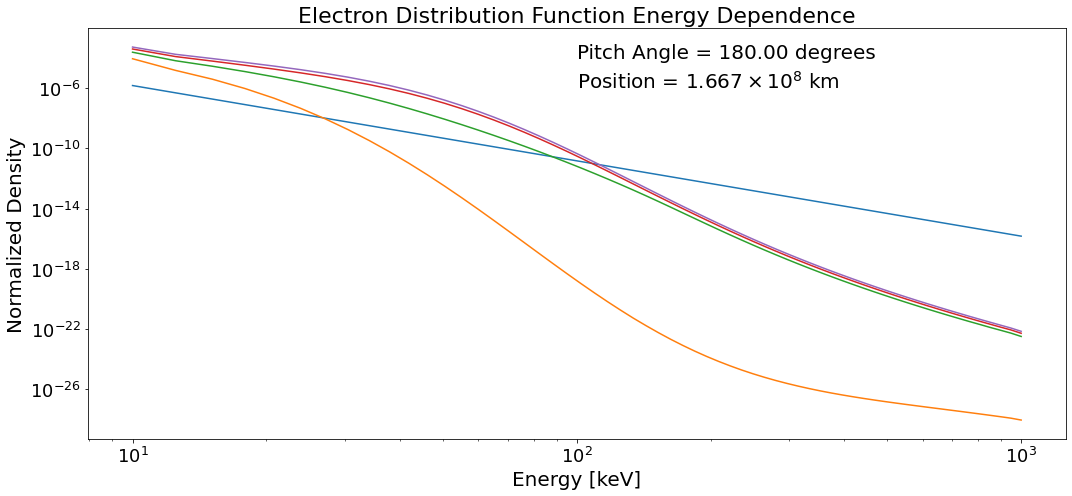

In [23]:
fig, ax = plt.subplots(ncols=1,figsize=(15,7))

ax.set_title(r"Electron Distribution Function Energy Dependence",fontsize=22)
ax.set_xlabel(r"Energy [keV]",fontsize=20)
ax.set_ylabel(r"Normalized Density",fontsize=20)

ax.plot(ekev,phiE0)
ax.plot(ekev,phiE1)
ax.plot(ekev,phiE2)
ax.plot(ekev,phiE3)
ax.plot(ekev,phiE4)

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_xlim(10,1000)
# ax.set_ylim(1e-30,1)
ax.text(1.0e2, 1.0e-4,r"Pitch Angle = %.2f degrees"%(pad[paindex]),fontsize=20)
ax.text(1.0e2, 1.0e-6,r"Position = %s km"%(sci_notation(soft[sindex],4,3)),fontsize=20)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=18,)


plt.tight_layout()

# plt.savefig('./Window0.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

<font size="3">Plot 2: variables</font>

<code>IDL
    phiPA0 = Reform(phi(eindex,*,sindex,0))
    phiPA1 = Reform(phi(eindex,*,sindex,1))
    phiPA2 = Reform(phi(eindex,*,sindex,2))
    phiPA3 = Reform(phi(eindex,*,sindex,3))
    phiPA4 = Reform(phi(eindex,*,sindex,4))
    </code>
    
<font size="3">Plot 2: Window 1</font>

<code>IDL
    Window,1,Title = 'Pitch Angle Dependence'
    plot, pad, phiPA0,/YLog,XTitle = 'Pitch Angle (degrees)', $
      YTitle = 'Normalized Density', $
      Title = 'Electron Distribution Function Pitch Angle Dependence',$
      XRange=[0.,180.],YRange=[1.E-30,1.E00],XStyle=1,YStyle=1
    oplot, pad, phiPA1, LineStyle = 1, color=112
    oplot, pad, phiPA2, LineStyle = 2, color=208
    oplot, pad, phiPA3, LineStyle = 3, color=165
    oplot, pad, phiPA4, LineStyle = 4, color=254
    ;Create and position Legend for electron distribution function vs. pitch angle graph
    XYOutS, 90., 1.0E-02, 'Energy = '+ strtrim((ekev(eindex)),2)+' keV', Size = 1.3
    XYOutS, 90., 1.0E-04, 'Position = '+ strtrim((soft(sindex)),2)+' km', Size = 1.3
    </code>

In [26]:
phiPA0 = phi[0,sindex,:,eindex].copy()
phiPA1 = phi[1,sindex,:,eindex].copy()
phiPA2 = phi[2,sindex,:,eindex].copy()
phiPA3 = phi[3,sindex,:,eindex].copy()
phiPA4 = phi[4,sindex,:,eindex].copy()

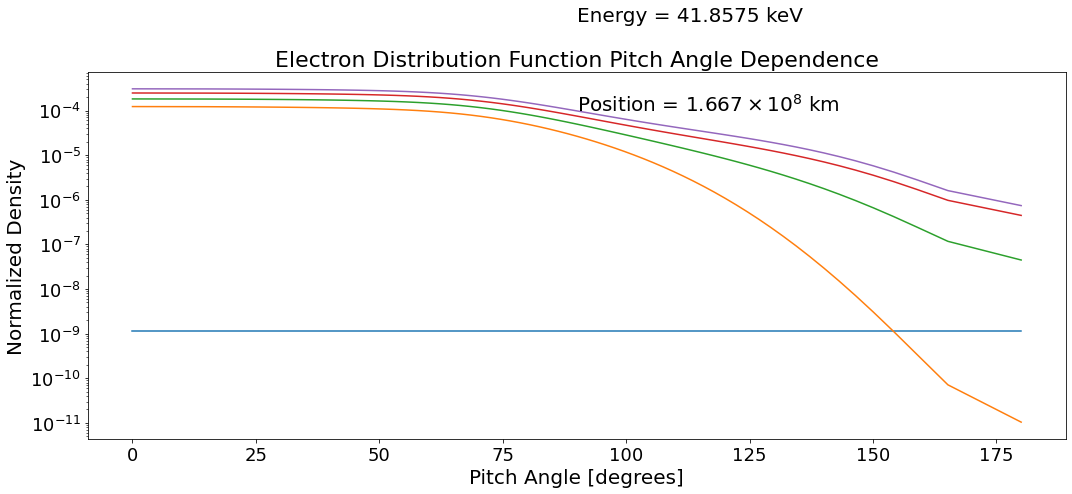

In [27]:
fig, ax = plt.subplots(ncols=1,figsize=(15,7))

ax.set_title(r"Electron Distribution Function Pitch Angle Dependence",fontsize=22)
ax.set_xlabel(r"Pitch Angle [degrees]",fontsize=20)
ax.set_ylabel(r"Normalized Density",fontsize=20)

ax.plot(pad,phiPA0)
ax.plot(pad,phiPA1)
ax.plot(pad,phiPA2)
ax.plot(pad,phiPA3)
ax.plot(pad,phiPA4)

# ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_xlim(0,180)
# ax.set_ylim(1e-30,1)
ax.text(90, 1.0e-2,r"Energy = %.4f keV"%(ekev[eindex]),fontsize=20)
ax.text(90, 1.0e-4,r"Position = %s km"%(sci_notation(soft[sindex],4,3)),fontsize=20)

# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=18,)


plt.tight_layout()

# plt.savefig('./Window1.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

<font size="3">Plot 3: variables</font>

<code>IDL
    phiS0 = Reform(phi(eindex,paindex,*,0))
    phiS1 = Reform(phi(eindex,paindex,*,1))
    phiS2 = Reform(phi(eindex,paindex,*,2))
    phiS3 = Reform(phi(eindex,paindex,*,3))
    phiS4 = Reform(phi(eindex,paindex,*,4))
    </code>
    
<font size="3">Plot 3: Window 2</font>

<code>IDL
    Window,2,Title = 'Spatial Dependence'
    plot, soft, phiS0,/YLog,XTitle = 'Distance (cm)', $
      YTitle = 'Normalized Density', $
      Title = 'Electron Distribution Function Spatial Dependence',$
      XRange=[0.,1.E+09],YRange=[1.E-30,1.E00],XStyle=1,YStyle=1
    oplot, soft, phiS1, LineStyle = 1, color=112
    oplot, soft, phiS2, LineStyle = 2, color=208
    oplot, soft, phiS3, LineStyle = 3, color=165
    oplot, soft, phiS4, LineStyle = 4, color=254
    ;Create and position Legend for electron distribution function vs. distance graph
    XYOutS, 5.e8, 1.0E-2, 'Energy = '+ strtrim((ekev(eindex)),2)+' keV', Size = 1.3
    XYOutS, 5.e8, 1.0E-4, 'Pitch Angle = '+ strtrim((pad(paindex)),2)+' deg', Size = 1.3
    </code>

In [28]:
phiS0 = phi[0,:,paindex,eindex].copy()
phiS1 = phi[1,:,paindex,eindex].copy()
phiS2 = phi[2,:,paindex,eindex].copy()
phiS3 = phi[3,:,paindex,eindex].copy()
phiS4 = phi[4,:,paindex,eindex].copy()

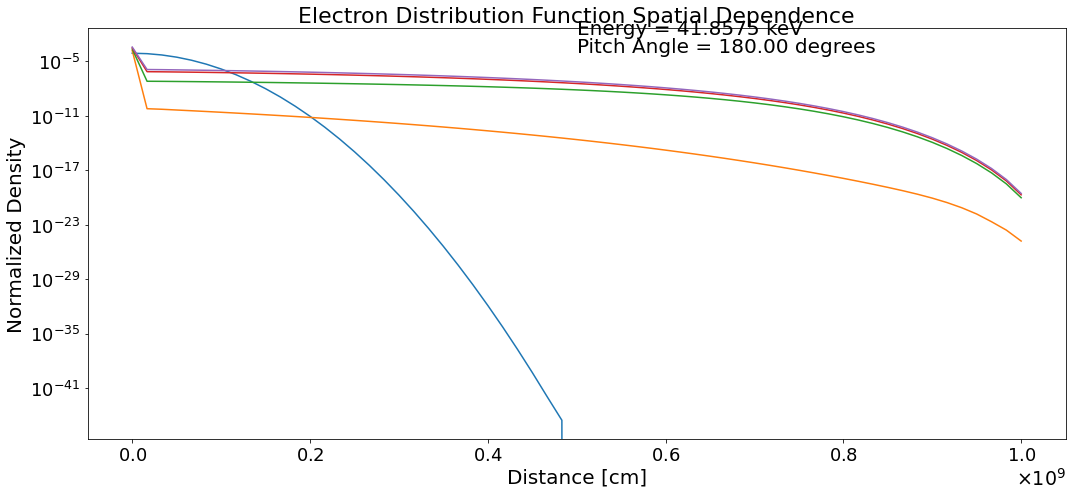

In [29]:
fig, ax = plt.subplots(ncols=1,figsize=(15,7))

ax.set_title(r"Electron Distribution Function Spatial Dependence",fontsize=22)
ax.set_xlabel(r"Distance [cm]",fontsize=20)
ax.set_ylabel(r"Normalized Density",fontsize=20)

ax.plot(soft,phiS0)
ax.plot(soft,phiS1)
ax.plot(soft,phiS2)
ax.plot(soft,phiS3)
ax.plot(soft,phiS4)

# ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_xlim(0,1e9)
# ax.set_ylim(1e-30,1)
ax.text(5e8, 1.0e-2,r"Energy = %.4f keV"%(ekev[eindex]),fontsize=20)
ax.text(5e8, 1.0e-4,r"Pitch Angle = %.2f degrees"%(pad[paindex]),fontsize=20)

# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(19)


plt.tight_layout()

# plt.savefig('./Window2.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

<font size="3">Plot 4: variables</font>

<code>IDL
    splt = [0,5,10,20,30]
    phiT0 = Reform(phi(eindex,paindex,splt(0),*))
    phiT1 = Reform(phi(eindex,paindex,splt(1),*))
    phiT2 = Reform(phi(eindex,paindex,splt(2),*))
    phiT3 = Reform(phi(eindex,paindex,splt(3),*))
    phiT4 = Reform(phi(eindex,paindex,splt(4),*))
    </code>
    
<font size="3">Plot 4: Window 3</font>

<code>IDL
    Window,3,Title = 'Time Dependence'
    plot, tr, phiT0,/YLog,XTitle = 'Time (s)', $
      YTitle = 'Normalized Density', $
      Title = 'Electron Distribution Function Time Dependence',$
      XRange=[0.,11.],YRange=[1.E-30,1.E00],XStyle=1,YStyle=1
    oplot, tr, phiT1, LineStyle = 1, color=112
    oplot, tr, phiT2, LineStyle = 2, color=208
    oplot, tr, phiT3, LineStyle = 3, color=165
    oplot, tr, phiT4, LineStyle = 4, color=254
    ;Create and position Legend for electron distribution function vs. time graph
    XYOutS, 5.5, 1.0E-02, 'Energy = '+ strtrim((ekev(eindex)),2)+' keV', Size = 1.3
    XYOutS, 5.5, 1.0E-04, 'Pitch Angle = '+ strtrim((pad(paindex)),2)+' deg', Size = 1.3
    </code>

In [30]:
splt = [0,5,10,20,30]

phiT0 = phi[:,splt[0],paindex,eindex].copy()
phiT1 = phi[:,splt[1],paindex,eindex].copy()
phiT2 = phi[:,splt[2],paindex,eindex].copy()
phiT3 = phi[:,splt[3],paindex,eindex].copy()
phiT4 = phi[:,splt[4],paindex,eindex].copy()

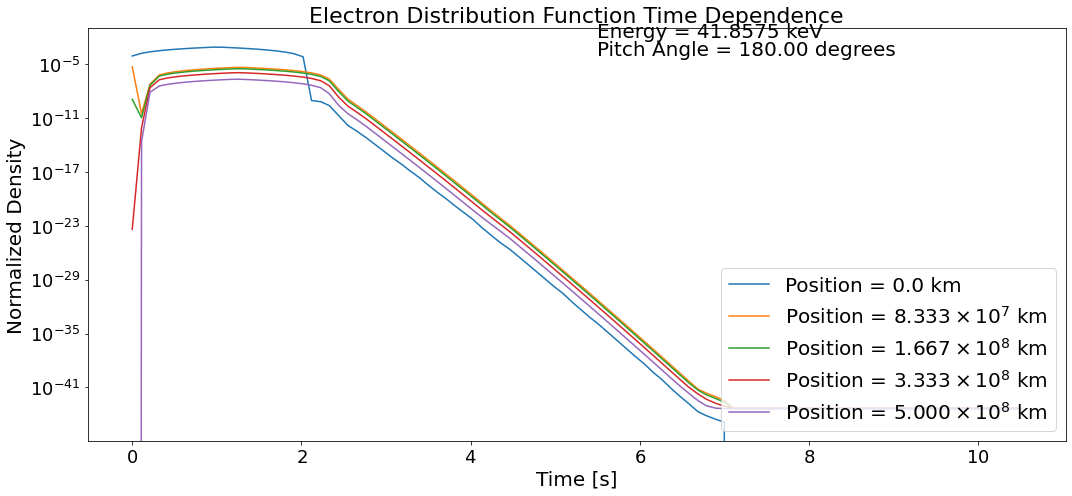

In [31]:
fig, ax = plt.subplots(ncols=1,figsize=(15,7))

ax.set_title(r"Electron Distribution Function Time Dependence",fontsize=22)
ax.set_xlabel(r"Time [s]",fontsize=20)
ax.set_ylabel(r"Normalized Density",fontsize=20)

ax.plot(tr,phiT0,label=r"Position = %s km"%(soft[splt[0]]))
ax.plot(tr,phiT1,label=r"Position = %s km"%(sci_notation(soft[splt[1]],4,3)))
ax.plot(tr,phiT2,label=r"Position = %s km"%(sci_notation(soft[splt[2]],4,3)))
ax.plot(tr,phiT3,label=r"Position = %s km"%(sci_notation(soft[splt[3]],4,3)))
ax.plot(tr,phiT4,label=r"Position = %s km"%(sci_notation(soft[splt[4]],4,3)))

# ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_xlim(0,11)
# ax.set_ylim(1e-30,1)
ax.text(5.5, 1.0e-2,r"Energy = %.4f keV"%(ekev[eindex]),fontsize=20)
ax.text(5.5, 1.0e-4,r"Pitch Angle = %.2f degrees"%(pad[paindex]),fontsize=20)

# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(19)
ax.legend(loc=4,fontsize=20)

plt.tight_layout()

# plt.savefig('./Window3.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

# END IDL PLOTS

In [24]:
soft,ekev,pad


(array([0.00000e+00, 1.66667e+07, 3.33333e+07, 5.00000e+07, 6.66667e+07,
        8.33333e+07, 1.00000e+08, 1.16667e+08, 1.33333e+08, 1.50000e+08,
        1.66667e+08, 1.83333e+08, 2.00000e+08, 2.16667e+08, 2.33333e+08,
        2.50000e+08, 2.66667e+08, 2.83333e+08, 3.00000e+08, 3.16667e+08,
        3.33333e+08, 3.50000e+08, 3.66667e+08, 3.83333e+08, 4.00000e+08,
        4.16667e+08, 4.33333e+08, 4.50000e+08, 4.66667e+08, 4.83333e+08,
        5.00000e+08, 5.16667e+08, 5.33333e+08, 5.50000e+08, 5.66667e+08,
        5.83333e+08, 6.00000e+08, 6.16667e+08, 6.33333e+08, 6.50000e+08,
        6.66667e+08, 6.83333e+08, 7.00000e+08, 7.16667e+08, 7.33333e+08,
        7.50000e+08, 7.66667e+08, 7.83333e+08, 8.00000e+08, 8.16667e+08,
        8.33333e+08, 8.50000e+08, 8.66667e+08, 8.83333e+08, 9.00000e+08,
        9.16667e+08, 9.33333e+08, 9.50000e+08, 9.66667e+08, 9.83333e+08,
        1.00000e+09]),
 array([ 10.    ,  12.5   ,  15.132 ,  17.9029,  20.8201,  23.8913,
         27.1247,  30.5287,  34.1

In [27]:
np.where(pad<45)

(array([52, 53, 54, 55, 56, 57, 58, 59, 60]),)

# Pitch Angle vs time for fixed energy and distance

<ipython-input-77-60d05c452d06>:12: RuntimeWarning: divide by zero encountered in log10
  im0 = ax[0,0].pcolormesh(tr,pad,np.log10(phi.T[eidx,:,sidx]),cmap='YlGnBu')
<ipython-input-77-60d05c452d06>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im0 = ax[0,0].pcolormesh(tr,pad,np.log10(phi.T[eidx,:,sidx]),cmap='YlGnBu')
<ipython-input-77-60d05c452d06>:23: RuntimeWarning: divide by zero encountered in log10
  im1 = ax[0,1].pcolormesh(tr,ekev,np.log10(phi.T[:,aidx,sidx]),cmap='YlGnBu')
<ipython-input-77-60d05c452d06>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'ne

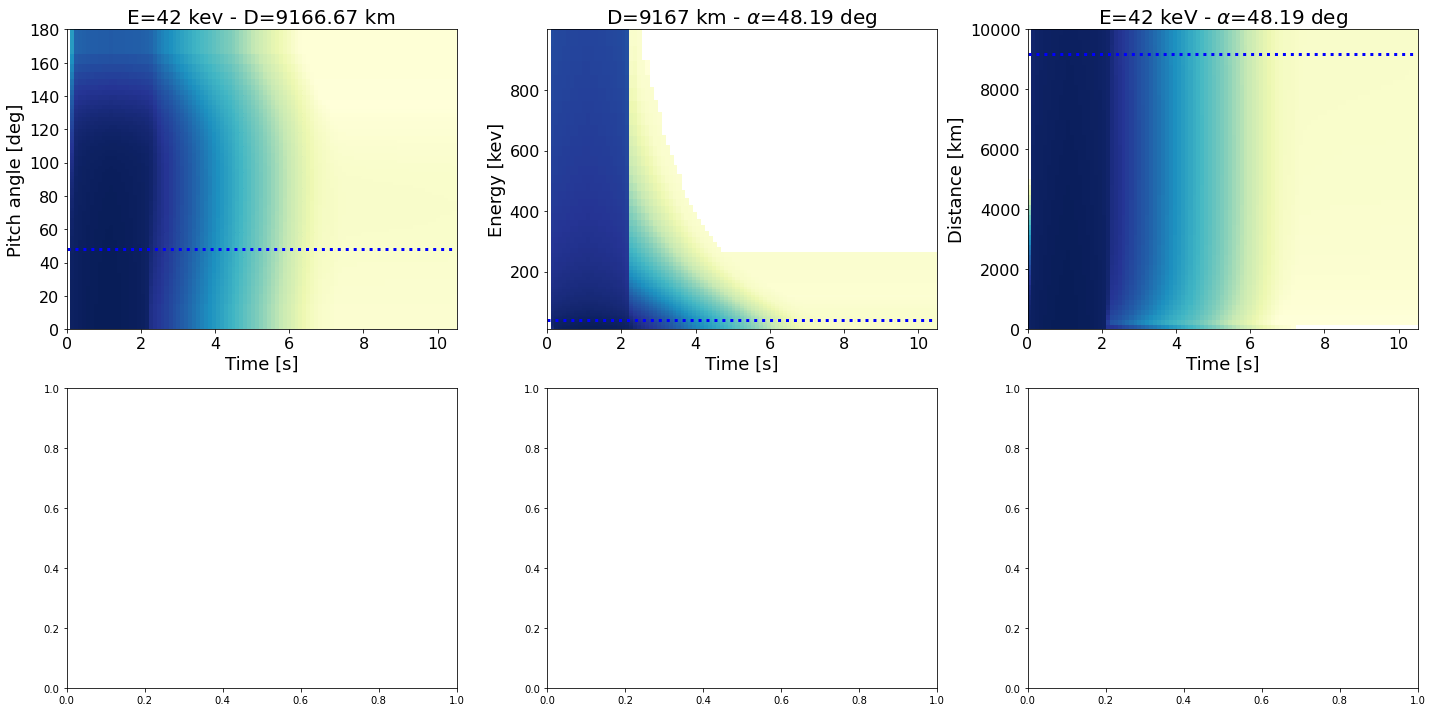

In [77]:
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))#nrows=3,

#cmap = 'pink'
camp = 'plasma'
###Overall index
sidx = 55
eidx = 10
aidx = 50


##### Pitch Angle vs Time
im0 = ax[0,0].pcolormesh(tr,pad,np.log10(phi.T[eidx,:,sidx]),cmap='YlGnBu')
# fig.colorbar(im0,cax=ax[0])

ax[0,0].set_title(r"E=%2.f kev - D=%.2f km"%(ekev[eidx],soft[sidx]/1e5),fontsize=20)
ax[0,0].set_ylabel(r'Pitch angle [deg]',fontsize=18)
ax[0,0].set_xlabel(r'Time [s]',fontsize=18)

ax[0,0].axhline(y=pad[aidx],color='b',ls=':',lw=3)

#### Energy vs time 

im1 = ax[0,1].pcolormesh(tr,ekev,np.log10(phi.T[:,aidx,sidx]),cmap='YlGnBu')
# im1 = ax[1].pcolormesh(tr,soft/1e5,np.log10(img_adapteq),cmap=cmap)
# fig.colorbar(im1,cax=ax[1])

ax[0,1].set_title(r"D=%2.f km - $\alpha$=%.2f deg"%(soft[sidx]/1e5,pad[aidx]),fontsize=20)
ax[0,1].set_ylabel(r'Energy [kev]',fontsize=18)
ax[0,1].set_xlabel(r'Time [s]',fontsize=18)
ax[0,1].axhline(y=ekev[eidx],color='b',ls=':',lw=3)



##### Distance vs time

im2 = ax[0,2].pcolormesh(tr,soft/1e5,np.log10(phi.T[eidx,aidx,:]),cmap='YlGnBu')
# fig.colorbar(im2,cax=ax[2])

ax[0,2].set_title(r"E=%2.f keV - $\alpha$=%.2f deg"%(ekev[eidx],pad[aidx]),fontsize=20)
ax[0,2].set_ylabel(r'Distance [km]',fontsize=18)
ax[0,2].set_xlabel(r'Time [s]',fontsize=18)
ax[0,2].axhline(y=soft[sidx]/1e5,color='b',ls=':',lw=3)

##Miscelaneous


ax[0,0].tick_params(axis='both', which='major', labelsize=16)
ax[0,1].tick_params(axis='both', which='major', labelsize=16)
ax[0,2].tick_params(axis='both', which='major', labelsize=16)


plt.tight_layout()

# Energia para Pitch Angle y distancias 10x10

phi.T ---> [Energia,Pitch, Distance, Time]

In [89]:
np.nanmin(np.log10(phi.T)),np.nanmax(np.log10(phi.T))

<ipython-input-89-70a951c82625>:1: RuntimeWarning: divide by zero encountered in log10
  np.nanmin(np.log10(phi.T)),np.nanmax(np.log10(phi.T))
<ipython-input-89-70a951c82625>:1: RuntimeWarning: invalid value encountered in log10
  np.nanmin(np.log10(phi.T)),np.nanmax(np.log10(phi.T))


(-inf, -0.015936932223118528)

<ipython-input-132-aa5235e2846c>:9: RuntimeWarning: divide by zero encountered in log10
  ax[int(i/6),int(j/6)].pcolormesh(tr,ekev,np.log10(phi.T[:,j,i]),cmap=cmap,vmin=vmin,vmax=vmax)
<ipython-input-132-aa5235e2846c>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[int(i/6),int(j/6)].pcolormesh(tr,ekev,np.log10(phi.T[:,j,i]),cmap=cmap,vmin=vmin,vmax=vmax)
<ipython-input-132-aa5235e2846c>:9: RuntimeWarning: invalid value encountered in log10
  ax[int(i/6),int(j/6)].pcolormesh(tr,ekev,np.log10(phi.T[:,j,i]),cmap=cmap,vmin=vmin,vmax=vmax)


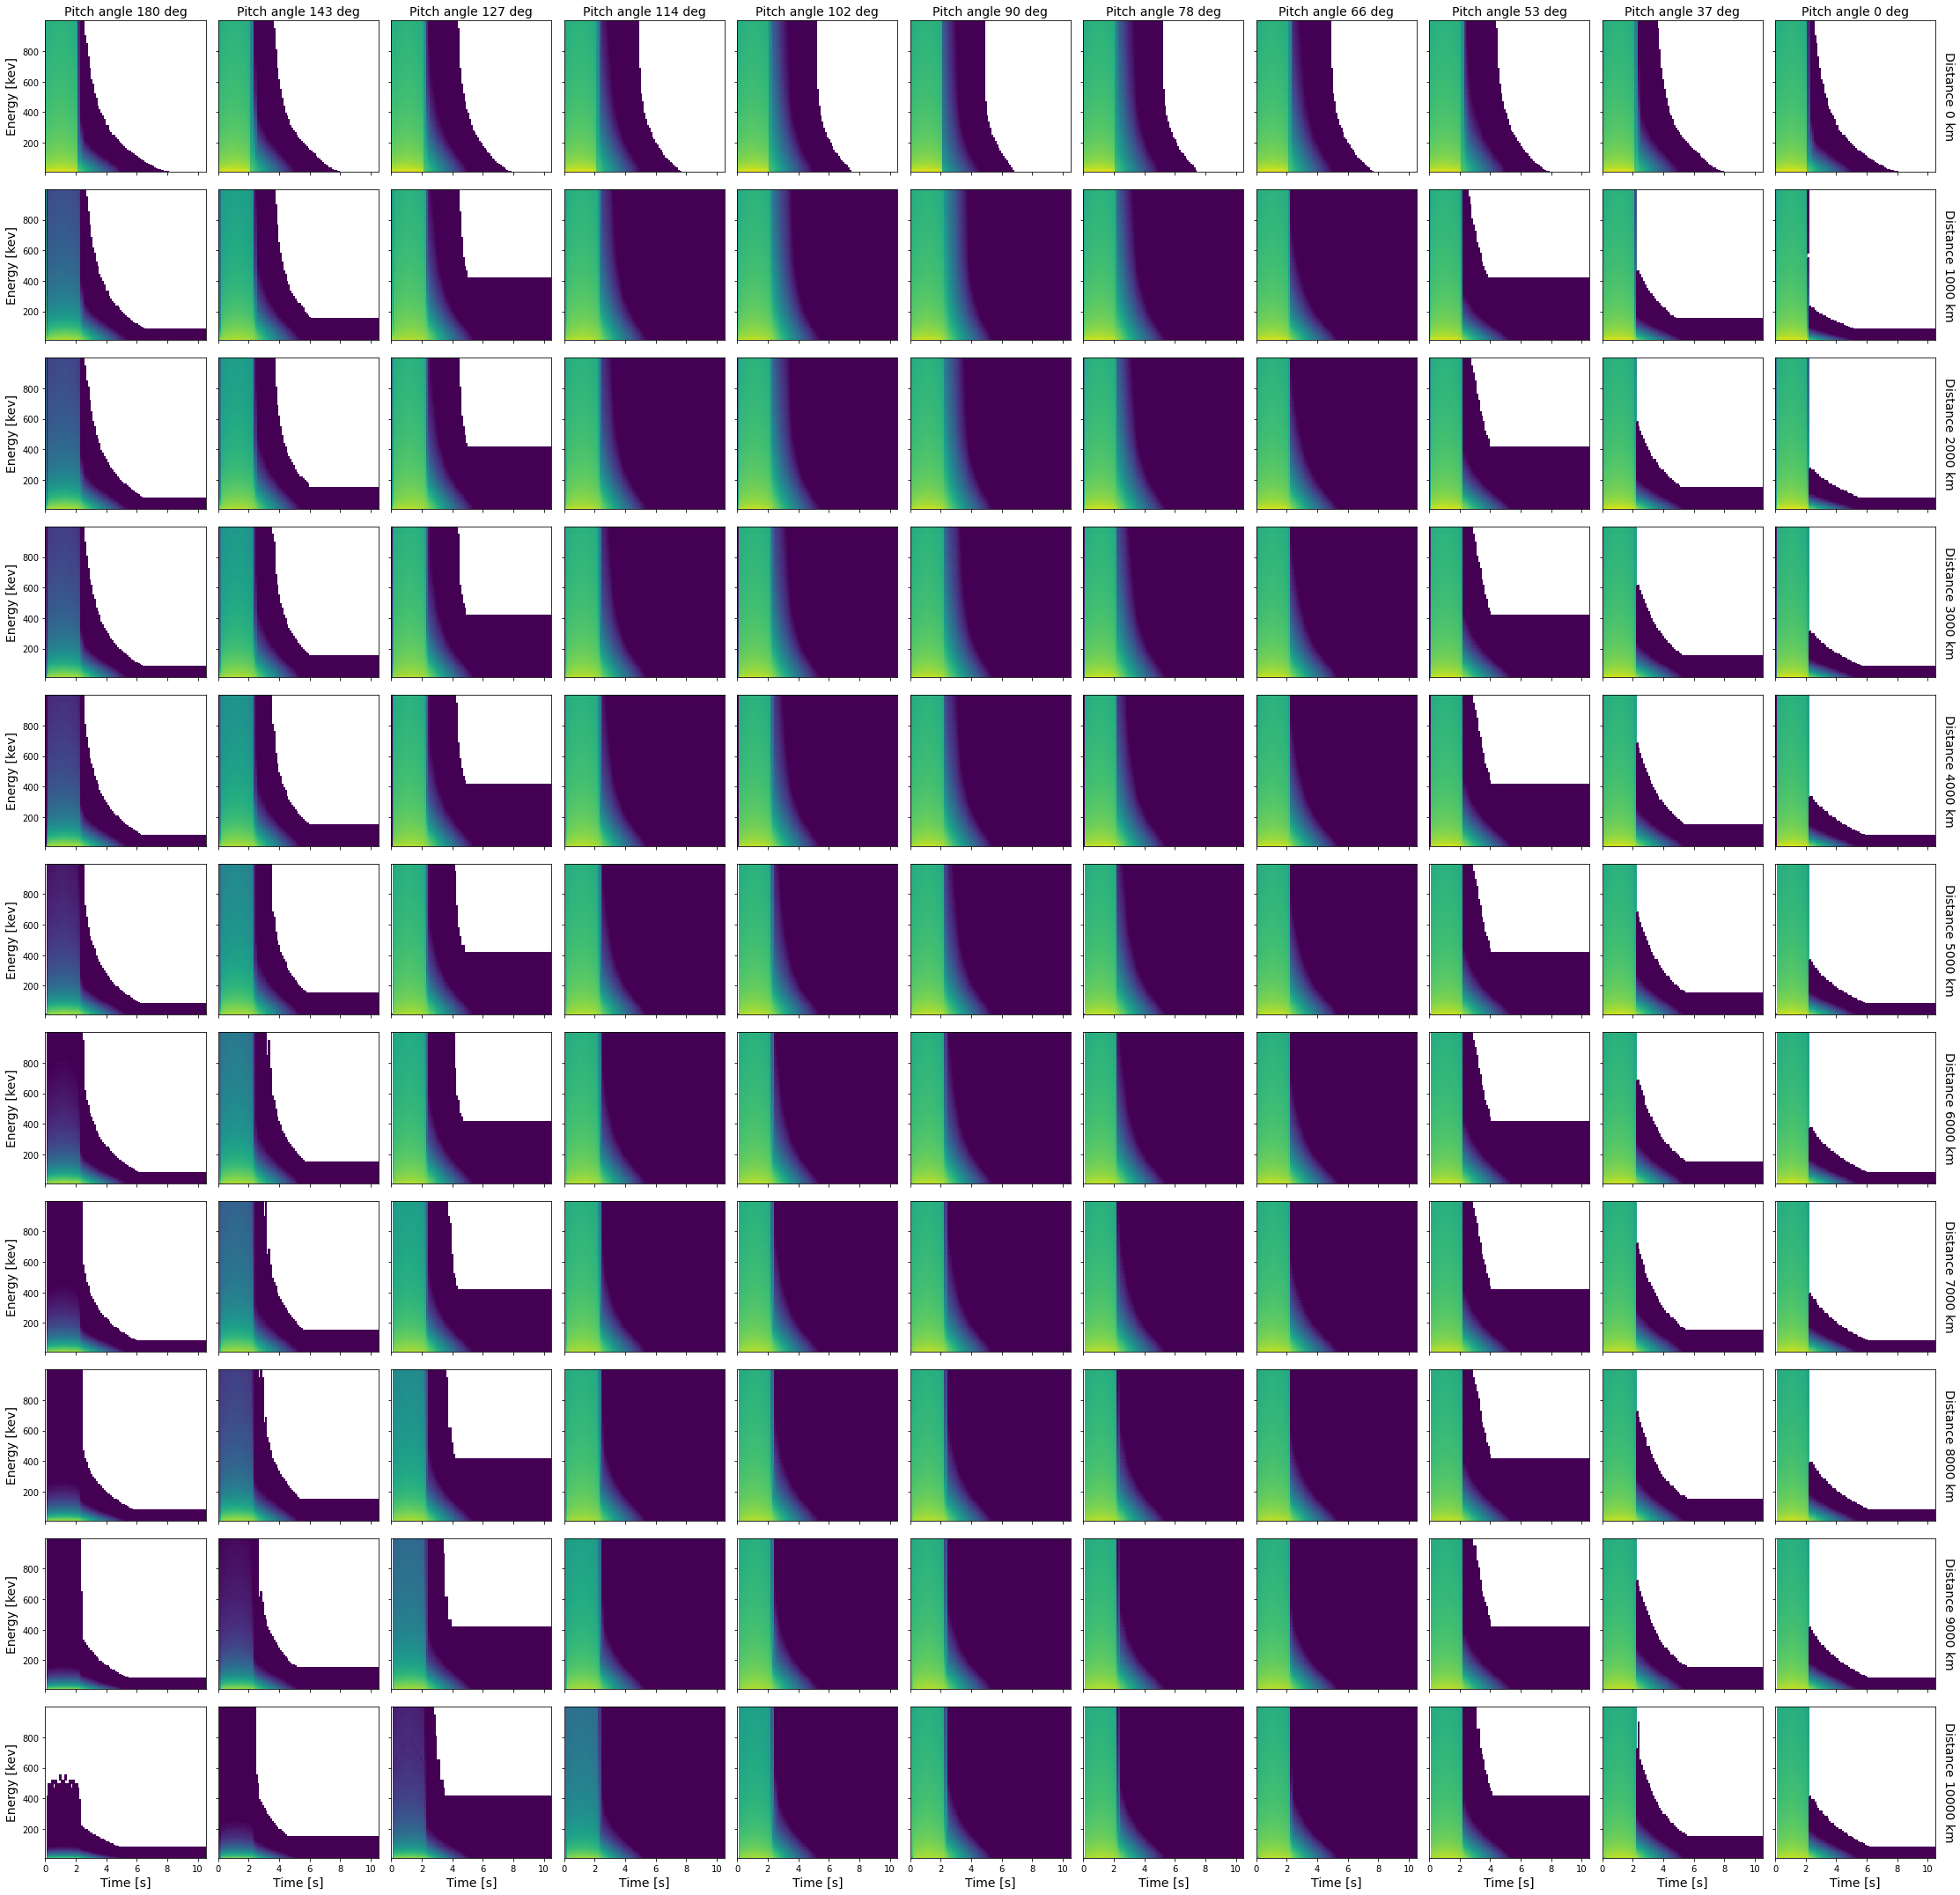

In [132]:
fig,ax = plt.subplots(ncols=11,nrows=11,figsize=(31,30),sharex=True,sharey=True)#nrows=3,

cmap='viridis'
vmin=-28
vmax=0

for i in range(0,len(pad),6):
    for j in range(0,len(pad),6):
        ax[int(i/6),int(j/6)].pcolormesh(tr,ekev,np.log10(phi.T[:,j,i]),cmap=cmap,vmin=vmin,vmax=vmax)

for i in range(0,11):
    ax[i,0].set_ylabel(r'Energy [kev]',fontsize=14)
    ax[0,i].set_title(r'Pitch angle %.0f deg'%(pad[int(i*6)]),fontsize=14)
    ax[10,i].set_xlabel(r'Time [s]',fontsize=14)
    ax[i,10].text(1.04,.5,r'Distance %.0f km'%(soft[int(i*6)]/1e5),fontsize=14,rotation=270,verticalalignment='center',transform=ax[i,10].transAxes)
    

plt.tight_layout()
#plt.savefig('./nombre.jpg',dpi=150,bbox_inches = 'tight',pad_inches = 0.05)


In [81]:
60/10

6.0

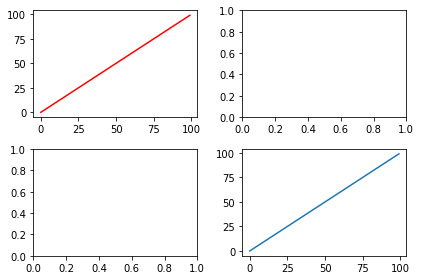

In [49]:
fig,ax = plt.subplots(ncols=2,nrows=2)

ax[0,0].plot(np.arange(0,100,1),"r")


ax[1,1].plot(np.arange(0,100,1))

plt.tight_layout()

In [97]:
phinorm = phi.copy()/(np.nanmax(phi))

In [100]:
np.where(phinorm.T == 1)

(array([0]), array([30]), array([0]), array([9]))

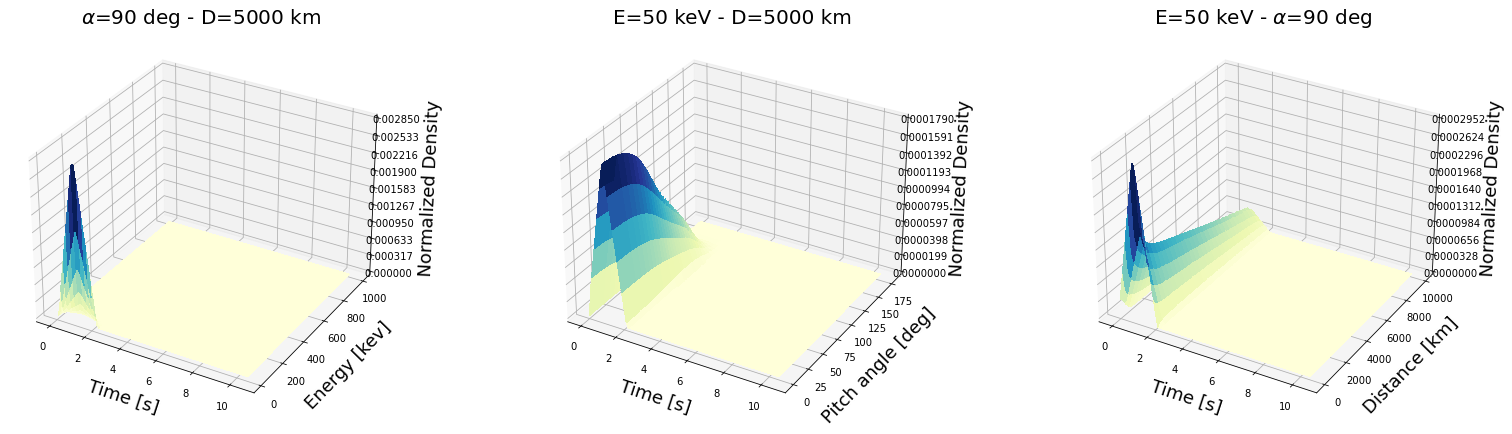

In [107]:
fig,ax = plt.subplots(ncols=3,subplot_kw={"projection": "3d"},figsize=(23,6))

def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$" 
    # return f"{10**val:.2e}" 

cmap = 'YlGnBu'

###Overall index
sidx = 30
eidx = 12
aidx = 30

##### Energy vs Time
X = tr.copy()
Y = ekev.copy()
X, Y = np.meshgrid(X, Y)

im0 = ax[0].plot_surface(X,Y,phi.T[:,aidx,sidx],cmap=cmap,linewidth=0, antialiased=False)

# ax[0].zaxis.set_major_formatter('{x:.02f}')
ax[0].set_title(r"$\alpha$=%.0f deg - D=%.0f km"%(pad[aidx],soft[sidx]/1e5),fontsize=20)
ax[0].set_ylabel(r'Energy [kev]',fontsize=18,labelpad=10)
ax[0].set_xlabel(r'Time [s]',fontsize=18,labelpad=8)
ax[0].set_zlabel(r'Normalized Density',fontsize=18,labelpad=14)

ax[0].zaxis.set_major_locator(LinearLocator(10))


del X,Y


##### Pitch vs Time
X = tr.copy()
Y = pad.copy()
X, Y = np.meshgrid(X, Y)

im0 = ax[1].plot_surface(X,Y,phi.T[eidx,:,sidx],cmap=cmap,linewidth=0, antialiased=False)

ax[1].set_title(r"E=%.0f keV - D=%.0f km"%(ekev[eidx],soft[sidx]/1e5),fontsize=20)
ax[1].set_ylabel(r'Pitch angle [deg]',fontsize=18,labelpad=10)
ax[1].set_xlabel(r'Time [s]',fontsize=18,labelpad=8)
ax[1].set_zlabel(r'Normalized Density',fontsize=18,labelpad=14)

ax[1].zaxis.set_major_locator(LinearLocator(10))


del X,Y


##### Distance vs Time
X = tr.copy()
Y = soft.copy()/1e5
X, Y = np.meshgrid(X, Y)

im0 = ax[2].plot_surface(X,Y,phi.T[eidx,aidx,:],cmap=cmap,linewidth=0, antialiased=False)

ax[2].set_title(r"E=%.0f keV - $\alpha$=%.0f deg"%(ekev[eidx],pad[aidx]),fontsize=20)
ax[2].set_ylabel(r'Distance [km]',fontsize=18,labelpad=10)
ax[2].set_xlabel(r'Time [s]',fontsize=18,labelpad=8)
ax[2].set_zlabel(r'Normalized Density',fontsize=18,labelpad=14)

ax[2].zaxis.set_major_locator(LinearLocator(10))


del X,Y

plt.tight_layout()





# ax2 = fig.add_subplot(122,projection="3d")

# # You still have to take log10(Z) but thats just one operation
# ax2.plot_wireframe(X, Y, np.log10(Z), rstride=10, cstride=10)
# ax2.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))s
# ax2.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
# ax2.set(title="Logarithmic z-axis (much better)")
# plt.savefig("LinearLog.png", bbox_inches='tight')
# plt.show()

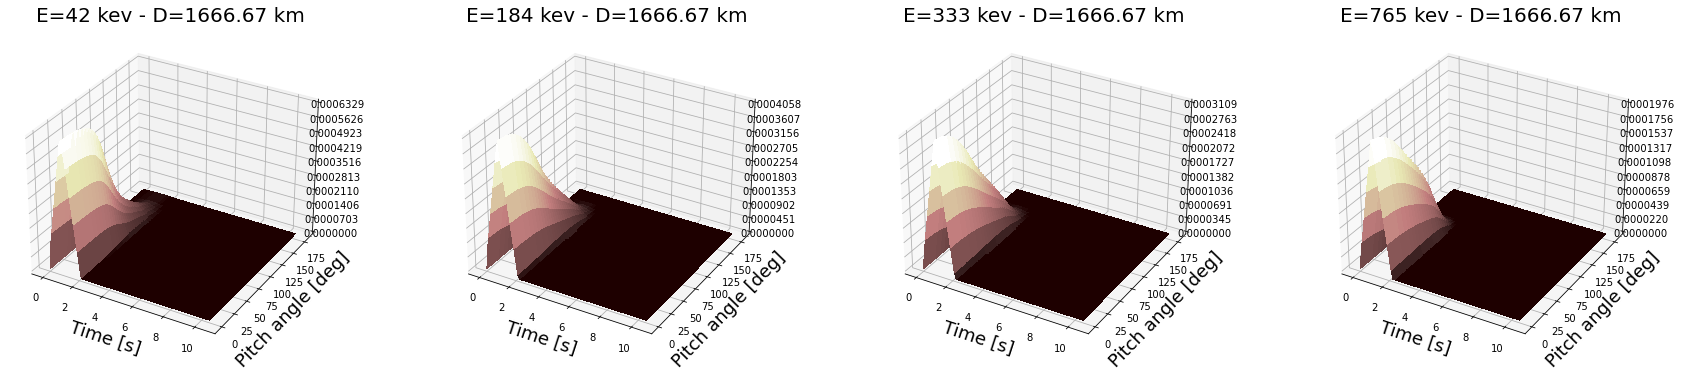

In [150]:
fig,ax = plt.subplots(ncols=4,subplot_kw={"projection": "3d"},figsize=(30,6))

###Overall index
sidx = 10
eidx = 10
aidx = 30

##### Pitch Angle vs Time
X = tr.copy()
Y = pad.copy()
X, Y = np.meshgrid(X, Y)

im0 = ax[0].plot_surface(X,Y,phi.T[sidx,:,eidx],cmap=cmap,linewidth=0, antialiased=False)
# fig.colorbar(im0,cax=ax[0])
# divider = make_axes_locatable(ax[0])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im0, shrink=0.5, aspect=5)
ax[0].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax[0].zaxis.set_major_formatter('{x:.02f}')
ax[0].set_title(r"E=%2.f kev - D=%.2f km"%(ekev[eidx],soft[sidx]/1e5),fontsize=20)
ax[0].set_ylabel(r'Pitch angle [deg]',fontsize=18)
ax[0].set_xlabel(r'Time [s]',fontsize=18)

del X,Y

###Overall index
sidx = 10
eidx = 30
aidx = 30

##### Pitch Angle vs Time
X = tr.copy()
Y = pad.copy()
X, Y = np.meshgrid(X, Y)

im0 = ax[1].plot_surface(X,Y,phi.T[sidx,:,eidx],cmap=cmap,linewidth=0, antialiased=False)
# fig.colorbar(im0,cax=ax[0])
# divider = make_axes_locatable(ax[0])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im0, shrink=0.5, aspect=5)
ax[1].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax[0].zaxis.set_major_formatter('{x:.02f}')
ax[1].set_title(r"E=%2.f kev - D=%.2f km"%(ekev[eidx],soft[sidx]/1e5),fontsize=20)
ax[1].set_ylabel(r'Pitch angle [deg]',fontsize=18)
ax[1].set_xlabel(r'Time [s]',fontsize=18)

del X,Y

###Overall index
sidx = 10
eidx = 40
aidx = 30

##### Pitch Angle vs Time
X = tr.copy()
Y = pad.copy()
X, Y = np.meshgrid(X, Y)

im0 = ax[2].plot_surface(X,Y,phi.T[sidx,:,eidx],cmap=cmap,linewidth=0, antialiased=False)
# fig.colorbar(im0,cax=ax[0])
# divider = make_axes_locatable(ax[0])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im0, shrink=0.5, aspect=5)
ax[2].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax[0].zaxis.set_major_formatter('{x:.02f}')
ax[2].set_title(r"E=%2.f kev - D=%.2f km"%(ekev[eidx],soft[sidx]/1e5),fontsize=20)
ax[2].set_ylabel(r'Pitch angle [deg]',fontsize=18)
ax[2].set_xlabel(r'Time [s]',fontsize=18)

del X,Y

###Overall index
sidx = 10
eidx = 55
aidx = 30

##### Pitch Angle vs Time
X = tr.copy()
Y = pad.copy()
X, Y = np.meshgrid(X, Y)

im0 = ax[3].plot_surface(X,Y,phi.T[sidx,:,eidx],cmap=cmap,linewidth=0, antialiased=False)
# fig.colorbar(im0,cax=ax[0])
# divider = make_axes_locatable(ax[0])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im0, shrink=0.5, aspect=5)
ax[3].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax[0].zaxis.set_major_formatter('{x:.02f}')
ax[3].set_title(r"E=%2.f kev - D=%.2f km"%(ekev[eidx],soft[sidx]/1e5),fontsize=20)
ax[3].set_ylabel(r'Pitch angle [deg]',fontsize=18)
ax[3].set_xlabel(r'Time [s]',fontsize=18)
# ax[3].yaxis.set_scale('log')


del X,Y

# Distance vs time for fixed pitch angle and energy

/Users/juancg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/juancg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


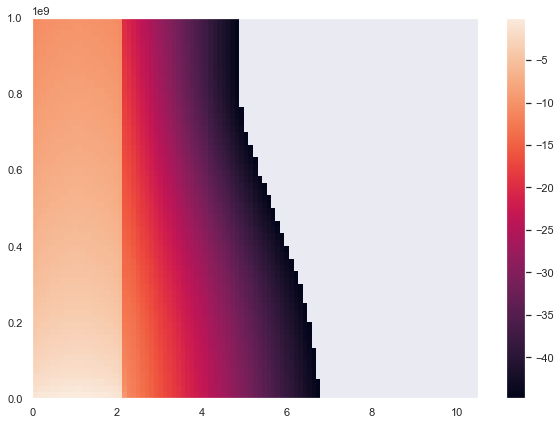

In [126]:
fig,ax = plt.subplots(figsize=(10,7))

# im = ax.pcolormesh(tr,soft/(1e5),np.log10(phi_dvst.T[-5,:,:]),cmap='rocket')
im = ax.pcolormesh(tr,soft,np.log10(phi.T[:,30,0]),cmap='rocket')

fig.colorbar(im)

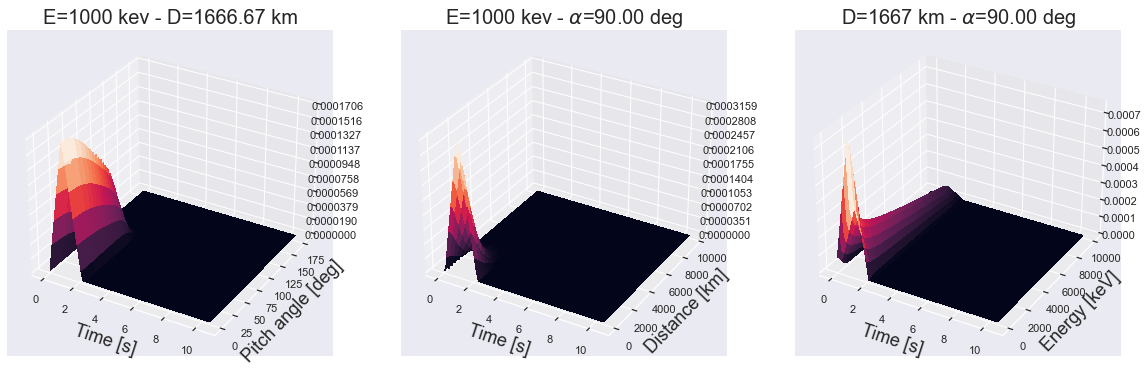

In [205]:
phi.T[:,aidx,eidx].shape

(61, 100)

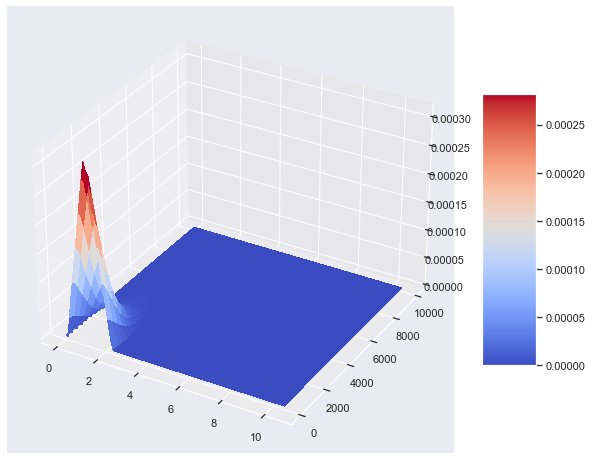

In [195]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
sidx = 0
eidx = 60
aidx = 30
# 3d contour plot
# ax.contour3D(tr,soft,np.log10(phi.T[0,30,:]), cmap = 'viridis')
# ax.plot_trisurf(tr, soft, np.log10(phi.T[0,30,:]), linewidth=0.2, antialiased=True)
X = tr.copy()
Y = soft.copy()/1e5
X, Y = np.meshgrid(X, Y)



surf = ax.plot_surface(X,Y, phi.T[:,aidx,eidx], cmap="coolwarm",
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf,shrink=0.5, aspect=5)

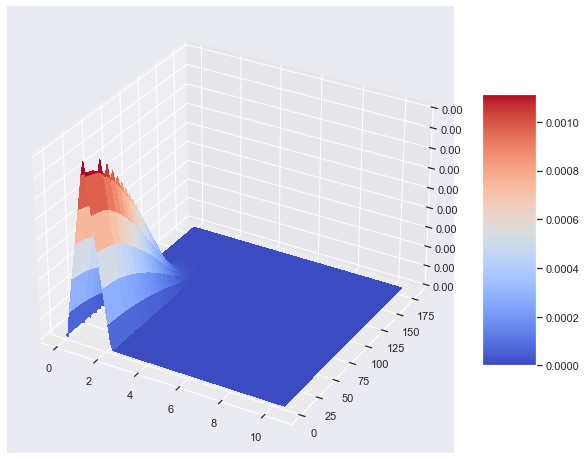

In [180]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))

sidx = 0
eidx = 60
aidx = 30
# 3d contour plot
# ax.contour3D(tr,soft,np.log10(phi.T[0,30,:]), cmap = 'viridis')
# ax.plot_trisurf(tr, soft, np.log10(phi.T[0,30,:]), linewidth=0.2, antialiased=True)
X = tr.copy()
Y = pad.copy()
X, Y = np.meshgrid(X, Y)



surf = ax.plot_surface(X,Y, phi.T[sidx,:,eidx], cmap="coolwarm",
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [171]:
np.log10(phi.T[0,30,:])

/Users/juancg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


array([[ -1.00000478,  -0.70115347,  -0.53910967, ...,         -inf,
                -inf,         -inf],
       [ -1.04825995,  -1.16508678,  -0.99616049, ..., -43.13746613,
        -43.15449949, -43.15449949],
       [ -1.19302477,  -1.41892345,  -1.24400706, ..., -43.06813955,
        -43.07531814, -43.1052814 ],
       ...,
       [        -inf,  -9.37717487,  -4.31304572, ..., -43.040556  ,
        -43.040556  , -43.04728939],
       [        -inf,  -9.78572853,  -4.3666467 , ..., -43.09759457,
        -43.07531814, -43.09759457],
       [        -inf, -10.15962726,  -4.45620503, ..., -43.13746613,
        -43.13746613, -43.13746613]])

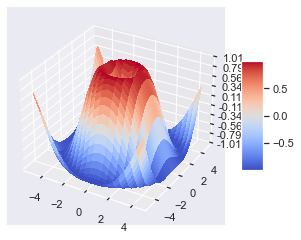

In [169]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [168]:
X.shape,Y.shape,Z.shape

((100, 40), (100, 40), (100, 40))

# Energy vs time for fixed pitch angle and distance

/Users/juancg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/juancg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


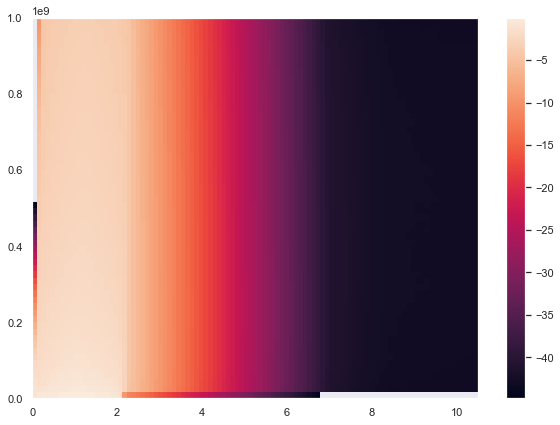

In [127]:
fig,ax = plt.subplots(figsize=(10,7))

# im = ax.pcolormesh(tr,soft/(1e5),np.log10(phi_dvst.T[-5,:,:]),cmap='rocket')
im = ax.pcolormesh(tr,soft,np.log10(phi.T[0,30,:]),cmap='rocket')

fig.colorbar(im)

In [110]:
ekev

array([ 10.    ,  12.5   ,  15.132 ,  17.9029,  20.8201,  23.8913,
        27.1247,  30.5287,  34.1124,  37.8854,  41.8575,  46.0393,
        50.4419,  55.0769,  59.9565,  65.0938,  70.5023,  76.1963,
        82.1909,  88.502 ,  95.1463, 102.141 , 109.506 , 117.259 ,
       125.421 , 134.014 , 143.061 , 152.586 , 162.613 , 173.17  ,
       184.284 , 195.984 , 208.303 , 221.271 , 234.925 , 249.299 ,
       264.432 , 280.364 , 297.137 , 314.795 , 333.386 , 352.958 ,
       373.563 , 395.256 , 418.094 , 442.138 , 467.452 , 494.101 ,
       522.158 , 551.695 , 582.792 , 615.531 , 649.998 , 686.284 ,
       724.486 , 764.705 , 807.047 , 851.625 , 898.555 , 947.964 ,
       999.98  ])

In [72]:
pad,len(pad)

(array([180.        , 165.16496301, 158.96047702, 154.15806724,
        150.07360342, 146.44265569, 143.13010235, 140.05552456,
        137.16654384, 134.427004  , 131.81034052, 129.29645556,
        126.86989765, 124.51813102, 122.23093006, 120.        ,
        117.81816088, 115.67926743, 113.57817848, 111.5102088 ,
        109.47120038, 107.45760312, 105.46602977, 103.49337918,
        101.53695903,  99.5940876 ,  97.66223639,  95.73917048,
         93.82255564,  91.91021126,  90.        ,  88.08978874,
         86.17744436,  84.26082952,  82.33776361,  80.4059124 ,
         78.46304097,  76.50662082,  74.53397023,  72.54239688,
         70.52879962,  68.4897912 ,  66.42182152,  64.32073257,
         62.18183912,  60.        ,  57.76906994,  55.48186898,
         53.13010235,  50.70354444,  48.18965948,  45.572996  ,
         42.83345616,  39.94447544,  36.86989765,  33.55734431,
         29.92639658,  25.84193276,  21.03952298,  14.83503699,
          0.        ]),
 61)

In [53]:
np.nanmax(phi_dvst),np.nanmin(phi_dvst)

(0.00075003, 0.0)